# バックテスト

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
HISTORICAL_DATA_PATH="../data/historicals"

BITFLYER_FILE_NAME = "2003100027_bitflyer.csv"
COINCHECK_FILE_NAME = "2003100027_coincheck.csv"
BITFLYER_PATH = "{}/{}".format(HISTORICAL_DATA_PATH, BITFLYER_FILE_NAME)
COINCHECK_PATH = "{}/{}".format(HISTORICAL_DATA_PATH, COINCHECK_FILE_NAME)

In [3]:
df_bf = pd.read_csv(BITFLYER_PATH, index_col="date", parse_dates=["date"])
df_cc = pd.read_csv(COINCHECK_PATH, index_col="date", parse_dates=["date"])

In [4]:
len(df_bf), len(df_cc)

(1003, 1003)

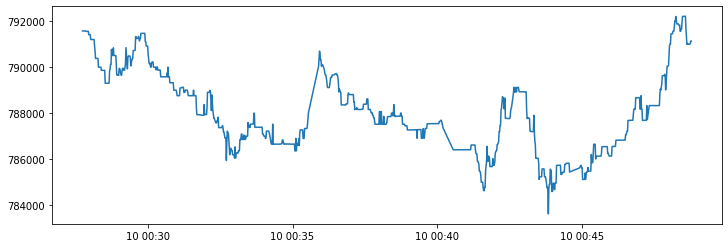

In [7]:
plt.figure(figsize=(12,4))
plt.plot(df_bf.index, df_bf['bid'])